## Analysis of frequent words in Reviews

In [1]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
from utils import read_json_file, get_all_text_data

In [3]:
reviews =  read_json_file(path="../data/reviews.json")

In [4]:
text_rating = get_all_text_data(reviews['data'], rating=True)
text, rating = zip(*text_rating)
rating_text_dict = {key:[] for key in list(set(rating))}

for text, rating in text_rating:
    rating_text_dict[rating].append(text)

100%|██████████| 855/855 [00:00<00:00, 105121.94it/s]


In [5]:
from collections import defaultdict
def get_nouns_by_freq(rating_text_dict,nlp,rating_value):
    texts = rating_text_dict[rating_value]
    docs = [nlp(text) for text in texts]

    freq_nouns = defaultdict(int)

    for doc in docs:
        for token in doc:
            if not (token.is_stop or token.is_punct) and token.pos_=="NOUN":
                freq_nouns[token.lemma_]+=1

    sorted_nouns_by_freq = sorted(freq_nouns.items(), key = lambda x:x[1], reverse = True)

    return zip(*sorted_nouns_by_freq)

In [6]:
import matplotlib.pyplot as plt
def plot_words_frequencies(words, frequencies, rating_value, top_n):
    plt.figure(figsize=(12, 8))
    plt.bar(words[:top_n], frequencies[:top_n], color='skyblue')

    plt.xlabel('Words')
    plt.ylabel('Frequencies')
    plt.title(f'Top {top_n} Word Frequencies for Rating Value of {rating_value}')
    plt.xticks(rotation=90)  
    plt.tight_layout()


    plt.show()

In [7]:
def plots_for_all_rating(rating_text_dict=rating_text_dict, nlp=nlp, top_n=10, rating_values=[1]):
    for value in rating_values:
        words, frequencies = get_nouns_by_freq(rating_text_dict=rating_text_dict, nlp=nlp, rating_value=value)
        plot_words_frequencies(words=words, frequencies=frequencies, rating_value=value, top_n=top_n)

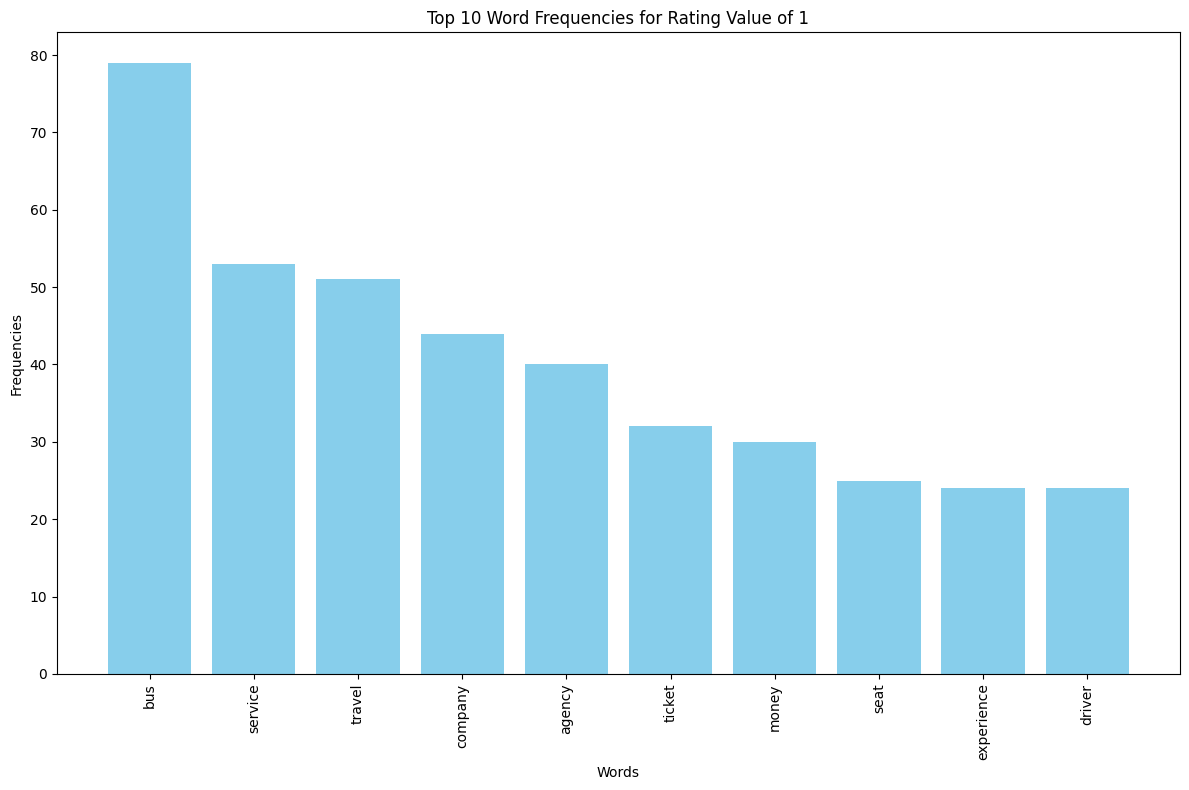

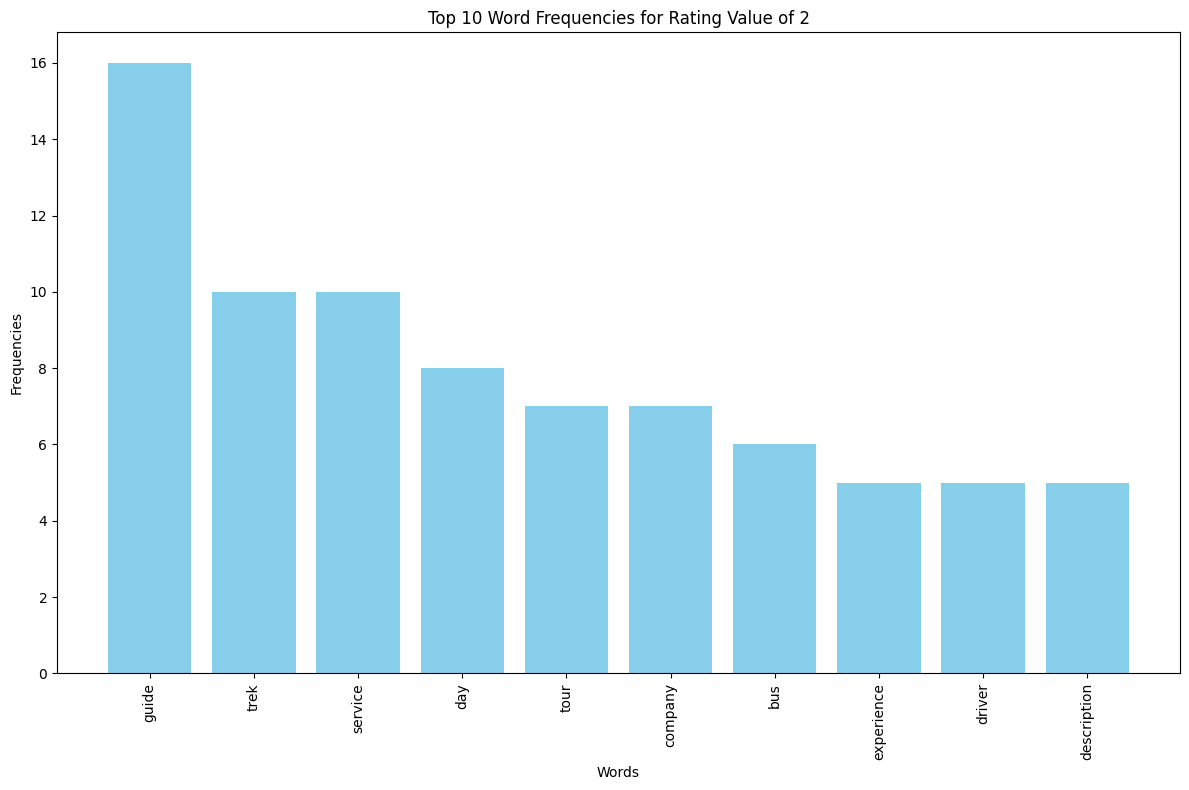

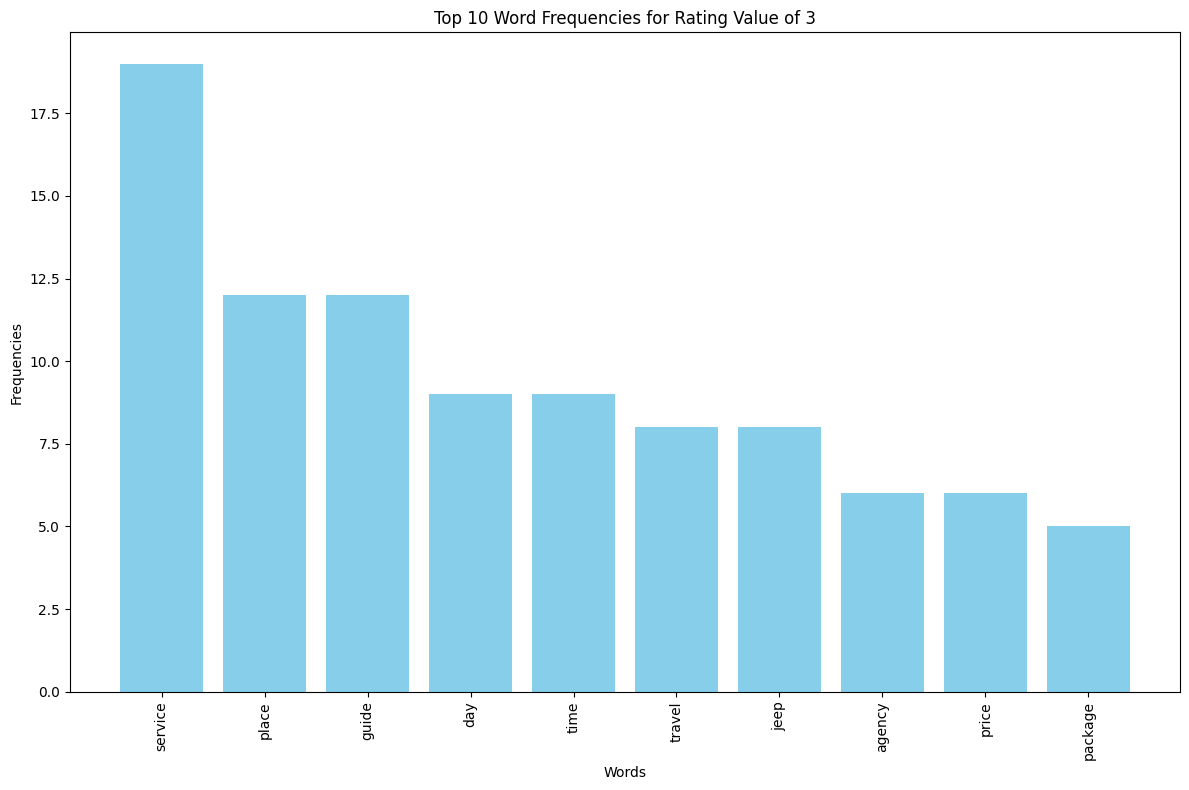

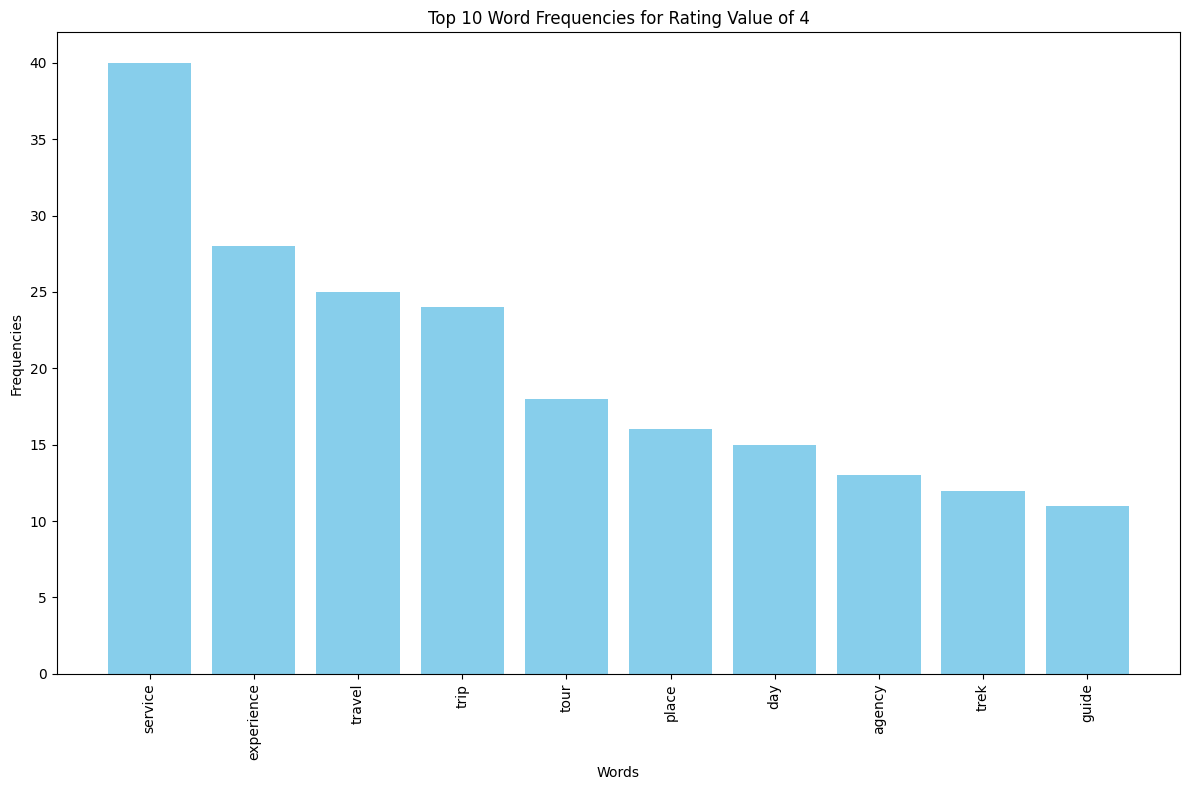

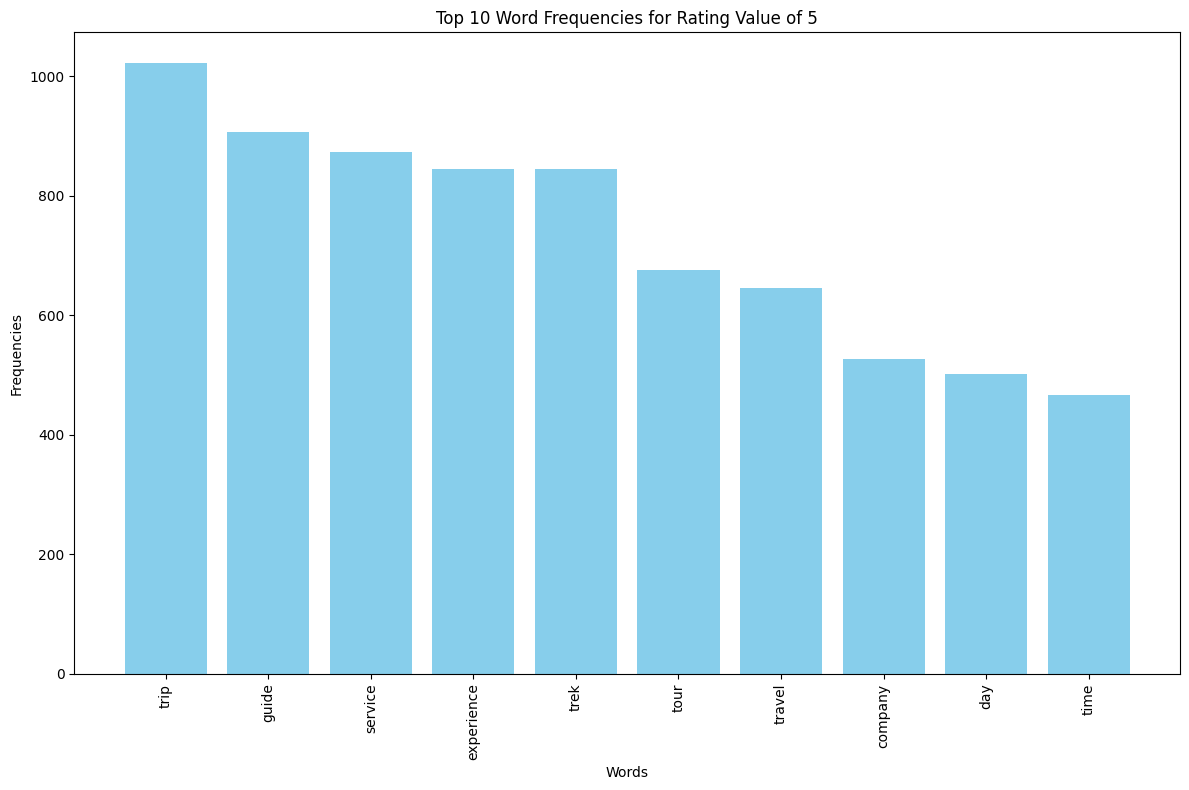

In [8]:
plots_for_all_rating(rating_text_dict, nlp, 10, [1,2,3,4,5])